# Boosting

In [31]:
# Boosting Algorithms

import pandas as pd
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import *

#Incarcare dataset
input_file = "data_banknote_authentication.txt"
data = pd.read_csv(input_file, header = 0)

array = data.values
X = array[:,0:4]
Y = array[:,4]
data
seed = 7
num_trees = 30

In [32]:
X.shape

(1370, 4)

In [33]:
data

,WaveletVar,WaveletSkew,WaveletKurt,ImgEntropy,Authenticity
0,4.54590,8.1674,-2.45860,-1.46210,0
1,3.86600,-2.6383,1.92420,0.10645,0
2,3.45660,9.5228,-4.01120,-3.59440,0
3,0.32924,-4.4552,4.57180,-0.98880,0
4,4.36840,9.6718,-3.96060,-3.16250,0
...,...,...,...,...,...
1365,-2.41000,3.7433,-0.40215,-1.29530,1
1366,0.40614,1.3492,-1.45010,-0.55949,1
1367,-1.38870,-4.8773,6.47740,0.34179,1
1368,-3.75030,-13.4586,17.59320,-2.77710,1


#  AdaBoostClassifier

In [34]:
kfold2 = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)

In [35]:
model = c(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
results2 = model_selection.cross_val_score(model, X, Y, cv=kfold2)
print(results)
print(results.mean())
print(results2.mean())

[0.99270073 0.98540146 0.98540146 1.         0.99270073 1.
 0.99270073 1.         1.         1.        ]
0.994890510948905
0.9956204379562044


In [36]:
#split the dataset: train + test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)
#adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=1)

#Fit
model.fit(X_train,Y_train)

#Predict 
Y_prediction = model.predict(X_test)
print("Y_prediction:",Y_prediction)
print("Y_test:",Y_test)

#Testare estimator pe 2 exemple concrete
my_test= [[3.6216,8.6661,-2.8073,-0.44699],[-2.5419,-0.65804,2.6842,1.1952]]
Y_prediction_test= model.predict(my_test)
print("Prediction form my given test:",Y_prediction_test)

# Testare 5 metrici pentru Clasificare
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score


print("Accuracy:",metrics.accuracy_score(Y_test, Y_prediction))

confusion_mat = confusion_matrix(Y_test, Y_prediction)
print("Confusion matrix is : ", confusion_mat)

recall_show = recall_score(Y_test, Y_prediction) 
print("Recall_score is :",recall_show)

precision_show = precision_score(Y_test, Y_prediction) 
print("Precision Score is : ", precision_show)


f1_score = f1_score(Y_test, Y_prediction)
print("f1 Score is : ",f1_score)


Y_prediction: [1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0.
 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0.
 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1.
 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1.
 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 1. 1. 0. 0. 1. 0.]
Y_test: [1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 

# Gradient Tree Boosting

In [37]:
num_trees = 100
kfold = model_selection.KFold(n_splits=10)

model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.994890510948905


In [38]:
#Impartire dataset: train + test
from sklearn.model_selection import train_test_split
X_for_train, X_for_test, Y_for_train, Y_for_test = train_test_split(X, Y, test_size = 0.15, random_state = 0)
my_test= [[3.6216,8.6661,-2.8073,-0.44699],[-2.5419,-0.65804,2.6842,1.1952]]

# Train GradientBoostingClassifier
gboost = GradientBoostingClassifier(n_estimators=num_trees,learning_rate=1)
gboost.fit(X_for_train, Y_for_train)

#Predict 
Y_prediction = gboost.predict(X_test)
# Testare model pe 2 exemple concrete
Y_prediction_test= gboost.predict(my_test)

print("Prediction form my given test:",Y_prediction_test)
print("Prediction:",Y_prediction)

# Testare 5 metrici pentru Clasificare
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score


print("Accuracy:",metrics.accuracy_score(Y_test, Y_prediction))

confusion_mat = confusion_matrix(Y_test, Y_prediction)
print("Confusion matrix is : ", confusion_mat)

recall_show = recall_score(Y_test, Y_prediction) 
print("Recall_score is :",recall_show)

precision_show = precision_score(Y_test, Y_prediction) 
print("Precision Score is : ", precision_show)

f1_score = f1_score(Y_test, Y_prediction)
print("f1 Score is : ",f1_score)


Prediction form my given test: [0. 1.]
Prediction: [1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0.
 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0.
 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1.
 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1.
 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 1. 1. 0. 0. 1. 0.]
Accuracy: 1.0
Confusion matrix is :  [[157   0]
 [  0 117]]
Recall_score is : 1.0
Precision Score is :  1.0
f1 Sco

# Vizualizare rezultate cu parametri diferiti

In [47]:
#Vizualizare rezultate obtinute cu parametri diferiti
range_k = range(1,151,10)
scoresA = {}
scores_listA = []
scoresG = {}
scores_listG = []

for k in range_k:
    ada = AdaBoostClassifier(n_estimators=k, random_state=seed)
    gboost = GradientBoostingClassifier(n_estimators=k,learning_rate=1)
    
    ada.fit(X_train, Y_train)
    gboost.fit(X_train, Y_train)
    Y_predictionA = ada.predict(X_test)
    Y_predictionG = gboost.predict(X_test)
    
    scoresA[k] = metrics.accuracy_score(Y_test,Y_predictionA)
    scores_listA.append(metrics.accuracy_score(Y_test,Y_predictionA))
    
    scoresG[k] = metrics.accuracy_score(Y_test,Y_predictionG)
    scores_listG.append(metrics.accuracy_score(Y_test,Y_predictionG))

Text(0, 0.5, 'Accuracy')

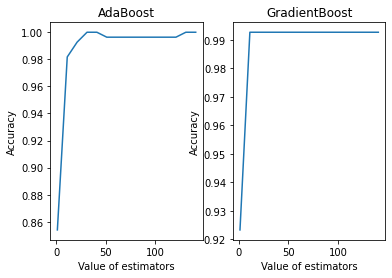

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.plot(range_k,scores_listA)
plt.title("AdaBoost")
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(range_k,scores_listG)
plt.title("GradientBoost")
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")

# Comparare rezultate obtinute pentru toti algoritmii prezentati

Acuratete maxima

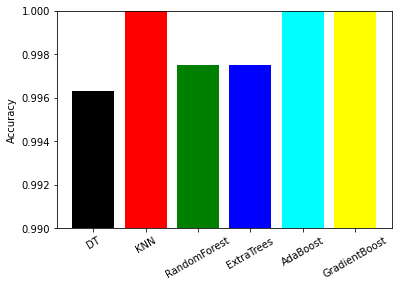

In [57]:
import numpy as np
import matplotlib.pyplot as plt
 
accuracy = [0.9963, 1.0, 0.9975,0.9975, 1.0,1.0]
bars = ('DT', 'KNN', 'RandomForest', 'ExtraTrees', 'AdaBoost','GradientBoost')
x_pos = np.arange(len(bars))

plt.bar(x_pos, accuracy, color=['black', 'red', 'green', 'blue', 'cyan','yellow'])

plt.xticks(x_pos, bars,rotation=30)
plt.ylabel("Accuracy")
plt.ylim((0.99,1))

plt.show()

Precizie maxima

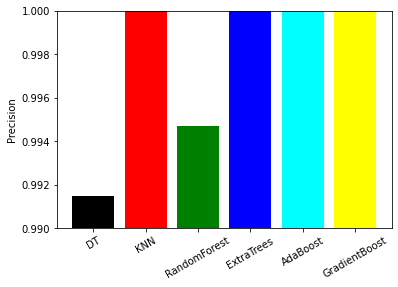

In [58]:
import numpy as np
import matplotlib.pyplot as plt
 
accuracy = [0.9915, 1.0, 0.9947,1.0, 1.0,1.0]
bars = ('DT', 'KNN', 'RandomForest', 'ExtraTrees', 'AdaBoost','GradientBoost')
x_pos = np.arange(len(bars))

plt.bar(x_pos, accuracy, color=['black', 'red', 'green', 'blue', 'cyan','yellow'])

plt.xticks(x_pos, bars,rotation=30)
plt.ylabel("Precision")
plt.ylim((0.99,1))

plt.show()

F1 score

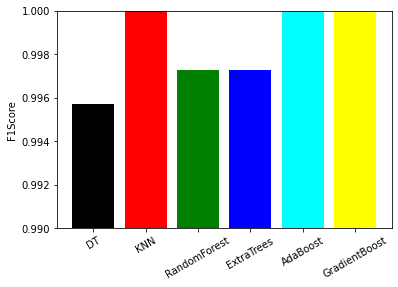

In [59]:
import numpy as np
import matplotlib.pyplot as plt
 
accuracy = [0.9957, 1.0, 0.9973,0.9973, 1.0,1.0]
bars = ('DT', 'KNN', 'RandomForest', 'ExtraTrees', 'AdaBoost','GradientBoost')
x_pos = np.arange(len(bars))

plt.bar(x_pos, accuracy, color=['black', 'red', 'green', 'blue', 'cyan','yellow'])

plt.xticks(x_pos, bars,rotation=30)
plt.ylabel("F1Score")
plt.ylim((0.99,1))

plt.show()